---

**<font color="green">Комментарий ревьюера V2</font>**

Привет еще раз)


---

---

**<font color="green">Комментарий ревьюера V2</font>**

Привет! Спасибо за доработку задания


---


---

**<font color="green">Комментарий ревьюера</font>**

Привет, Роман! Спасибо тебе за выполненное задание!
Меня зовут Горленко Екатерина, я буду проверять твою работу.

По ходу тетрадки ты найдешь комментарии к проекту, они будут в отдельных ячейках Markdown с заголовком «Комментарий ревьюера». Постарайся учесть эти комментарии для дальнейших проектов.

Пожалуйста, не удаляй комментарии. Будет здорово, если для своих ответов ты тоже выберешь какой-то **<font color="blue">заметный цвет</font>**  или **формат**, так мне будет легче отследить изменения.

---

Я буду красить комментарии цветом:

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>

---




# Аналитика в Яндекс.Афише

Цель исследования: помочь маркетологам Яндекс.Афиши оптимизировать маркетинговые затраты. В распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
* лог сервера с данными о посещениях сайта Яндекс.Афиши,
* выгрузка всех заказов за этот период,
* статистика рекламных расходов.  

По результатам необходимо ответить на следующие вопросы:  
* как люди пользуются продуктом?
* когда они начинают покупать?
* сколько денег приносит каждый клиент?
* когда клиент окупается?

 ---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера

В начале работы всегда важно отметить цель - основной вопрос, на который ты даешь ответ своим исследованием. Чем твоя работа полезна получателю, на какой бизнес вопрос она ответит. И хорошо бы обозначить план работы, чтобы дать понять читателю, что тут будет происходить.
</div>

---


<div class="alert alert-block alert-info">

### Комментарий от студента  
    
Исправил 
</div>

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера V2

Отлично, принимается)

</div>

---


## Выгрузка данных

In [1]:
# Импортируем необходимые библиотеки и модули
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from scipy import stats as st

In [2]:
# Считаем данные из датасета visits_log, проверим корректность выгрузки
visits_log = pd.read_csv('/datasets/visits_log.csv')
visits_log.head(10) 

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [3]:
# Расмотрим общую информацию о данных
visits_log.info()
visits_log.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [4]:
# Проверим таблицу на наличие дуликатов
visits_log.duplicated().sum()

0

В таблице visits_log 5 столбцов. В них содержится лог сервера с информацией о посещениях сайта:  
* **Device** — категория устройства пользователя
* **End Ts** — дата и время окончания сессии
* **Source Id** — идентификатор рекламного источника, из которого пришел пользователь
* **Start Ts** — дата и время начала сессии
* **Uid** — уникальный идентификатор пользователя

В данных нет пропусков и нет дубликатов. Столбцы **End Ts** и **Start Ts** необходимо привести к временному типу. Необходимо переименовать имена всех столбцов, приведя их к нижнему регистру и убрав пробелы.

In [5]:
# Считаем данные из датасета orders_log, проверим корректность выгрузки
orders_log = pd.read_csv('/datasets/orders_log.csv')
orders_log.head(10) 

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [6]:
# Расмотрим общую информацию о данных
orders_log.info()
orders_log.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [7]:
# Проверим таблицу на наличие дуликатов
orders_log.duplicated().sum()

0

В таблице orders 3 столбцов. В них содержится лог сервера с информацией о посещениях сайта:  
* **Buy Ts** — дата и время заказа
* **Revenue** — выручка Яндекс.Афиши с этого заказа
* **Uid** — уникальный id пользователя, который сделал заказ

В данных нет пропусков и дубликатов. Столбец **Buy Ts** необходимо привести к временному типу. Необходимо переименовать имена всех столбцов, приведя их к нижнему регистру и убрав пробелы.

In [8]:
# Считаем данные из датасета costs, проверим корректность выгрузки
costs = pd.read_csv('/datasets/costs.csv')
costs.head(10) 

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [9]:
# Расмотрим общую информацию о данных
costs.info()
costs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [10]:
# Проверим таблицу на наличие дуликатов
costs.duplicated().sum()

0

В таблице orders 3 столбцов. В них содержится лог сервера с информацией о посещениях сайта:  
* **source_id** — идентификатор рекламного источника
* **dt** — дата
* **costs** — затраты на этот рекламный источник в этот день

В данных нет пропусков и дубликатов. Столбец **dt** необходимо привести к временному типу.

## Предобработка данных

In [11]:
# Переведм именна столбцов в нижний регистр и уберем пробелы
visits_log.columns = visits_log.columns.str.lower()
visits_log.columns = visits_log.columns.str.replace(' ', '_')
visits_log.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [12]:
# Поменяем порядок столбцов для удобства
visits_log = visits_log[['uid', 'start_ts', 'end_ts',  'device', 'source_id']] 
visits_log.head()

,uid,start_ts,end_ts,device,source_id
0,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,touch,4
1,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,desktop,2
2,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,touch,5
3,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,desktop,9
4,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,desktop,3


In [13]:
# Приведем столбцы к временному типу
visits_log['end_ts'] = pd.to_datetime(visits_log['end_ts'], format='%Y-%m-%d %H:%M:%S')
visits_log['start_ts'] = pd.to_datetime(visits_log['start_ts'], format='%Y-%m-%d %H:%M:%S')
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
uid          359400 non-null uint64
start_ts     359400 non-null datetime64[ns]
end_ts       359400 non-null datetime64[ns]
device       359400 non-null object
source_id    359400 non-null int64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [14]:
# Переведм именна столбцов в нижний регистр и уберем пробелы
orders_log.columns = orders_log.columns.str.lower()
orders_log.columns = orders_log.columns.str.replace(' ', '_')
orders_log.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [15]:
# Приведем столбцы к временному типу
orders_log['buy_ts'] = pd.to_datetime(orders_log['buy_ts'], format='%Y-%m-%d %H:%M:%S')
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [16]:
# Приведем столбец к временному типу
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d %H:%M:%S')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [17]:
# Проверим, сколько сессий с нулевой длительностью
visits_log.query('start_ts == end_ts').count()

uid          35794
start_ts     35794
end_ts       35794
device       35794
source_id    35794
dtype: int64

Сессий весьма много. Это может быть вызвано как быстро перванным сеансом на стороне пользователя, так и ошибкой при выгрузке из базы данных. В любом случае от этих строк можно избавиться.

In [18]:
# Удалим строки и проверим результат
visits_log = visits_log.drop(visits_log.query('start_ts == end_ts').index)
visits_log.query('start_ts == end_ts').count()

uid          0
start_ts     0
end_ts       0
device       0
source_id    0
dtype: int64

In [19]:
# Проверим какими девайсами пользуются пользователи
visits_log['device'].value_counts()

desktop    238878
touch       84728
Name: device, dtype: int64

Всего два типа устройств. Десктопные девайсы в три раза превышают мобильные по количеству.

In [20]:
# Проверим с каких рекламных источников пришли клиенты
visits_log['source_id'].value_counts()

4     90896
3     76585
5     59520
2     43468
1     32146
9     11980
10     8971
7        35
6         5
Name: source_id, dtype: int64

In [21]:
# Проверим какие рекламные источники есть в затратах
costs['source_id'].value_counts()

5     364
9     363
3     363
1     363
10    363
4     363
2     363
Name: source_id, dtype: int64

Видим, что в *visits_log* есть два источника (6 и 7), которых нет в *costs*. Не зная расшифровки источников трудно судить, баг это или нет. В любом случае этот нюанс нужно будет учесть при подсчете экономических показателей.

### Промежуточный вывод  
Мы привели данные к нужным типам, избавились от лишних данных, и выделили ряд ключевых моментов, которые нужно будет учесть при дальнейшем анализе.

 ---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера

Хороший блок, ты глубоко смотришь данные и первые выводы уже готовы. Стоит делать краткое резюме (выводы) в конце раздела, чтобы зафиксировать проделанные преобразования.
</div>

---


<div class="alert alert-block alert-info">

### Комментарий от студента  
    
Исправил 
</div>

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера V2

Супер

</div>

---


## Исследовательский анализ данных

### Анализ продукта  

Узнаем, сколько людей пользуются сервисом в день, неделю, месяц. Для этого посчитаем три показателя:  
* **DAU** — количество уникальных пользователей в день;  
* **WAU** — количество уникальных пользователей в неделю;  
* **MAU** — количество уникальных пользователей в месяц.  

In [22]:
# Для каждого пользователя добавим время первого визита
visits_log = (visits_log
              .join(
                  visits_log
                  .groupby('uid')
                  .agg(first_visit_datetime=('start_ts','min')),
                  on='uid'))
visits_log.head()

,uid,start_ts,end_ts,device,source_id,first_visit_datetime
0,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,touch,4,2017-12-20 17:20:00
1,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,desktop,2,2018-02-19 16:53:00
3,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,desktop,9,2018-03-09 20:05:00
5,16007536194108375387,2017-09-03 21:35:00,2017-09-03 21:36:00,desktop,5,2017-09-03 21:35:00
6,6661610529277171451,2018-01-30 11:13:00,2018-01-30 12:09:00,desktop,1,2017-06-29 09:00:00


In [23]:
# Добавим тсолбцы, необходимые для дальнейшего анализа
visits_log['session_year']  = visits_log['start_ts'].dt.year
visits_log['session_month'] = visits_log['start_ts'].dt.month
visits_log['session_week']  = visits_log['start_ts'].dt.week
visits_log['session_date'] = visits_log['start_ts'].dt.date
visits_log.head()

,uid,start_ts,end_ts,device,source_id,first_visit_datetime,session_year,session_month,session_week,session_date
0,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,touch,4,2017-12-20 17:20:00,2017,12,51,2017-12-20
1,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,desktop,2,2018-02-19 16:53:00,2018,2,8,2018-02-19
3,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,desktop,9,2018-03-09 20:05:00,2018,5,20,2018-05-20
5,16007536194108375387,2017-09-03 21:35:00,2017-09-03 21:36:00,desktop,5,2017-09-03 21:35:00,2017,9,35,2017-09-03
6,6661610529277171451,2018-01-30 11:13:00,2018-01-30 12:09:00,desktop,1,2017-06-29 09:00:00,2018,1,5,2018-01-30


In [24]:
# Изучим посещаемость ресурса
dau_total = visits_log.groupby('session_date').agg(dau=('uid','nunique')).mean()
wau_total = visits_log.groupby(['session_year', 'session_week']).agg(wau=('uid','nunique')).mean() 
mau_total = visits_log.groupby(['session_year', 'session_month']).agg(mau=('uid','nunique')).mean()

print("Количество уникальных пользователей в день (DAU):", int(dau_total))
print("Количество уникальных пользователей в неделю (WAU):", int(wau_total))
print("Количество уникальных пользователей в месяц (MAU):", int(mau_total))

Количество уникальных пользователей в день (DAU): 817
Количество уникальных пользователей в неделю (WAU): 5148
Количество уникальных пользователей в месяц (MAU): 20955


***

Узнаем количество сессий в день.

In [25]:
sessions = visits_log.groupby('session_date').agg(sessions_per_day=('uid','count'))
print("Среднее количество сессий в день:", int(sessions.mean()))
print("Медианное количество сессий в день:", int(sessions.median()))

Среднее количество сессий в день: 889
Медианное количество сессий в день: 898


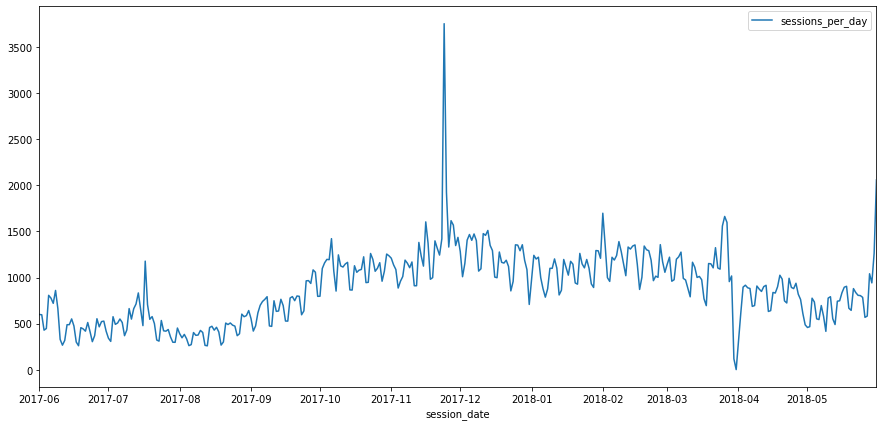

In [26]:
# Построим график по количеству сессий
sessions.plot(figsize=(15,7));

---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера

Чтобы перед графиком не выводились лишние надписи, используй знак ";" в конце кода (поправила на этом графике)
</div>

---


<div class="alert alert-block alert-info">

### Комментарий от студента  
    
Исправил 
</div>

Видим сильный всплекс посещаемости в конце ноября 17 года (скорее всего вызван удачной рекламной интеграцией или каким-то очень "хайповым" событием), а также проседание до полного нуля в начале апреля (скорее всего вызвано техническими работами или падением серверов).


---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Тут все хорошо, двигаемся дальше ). Отлично что отметил аномалии
</div>

---


***

Узнаем сколько длится одна сессия. Для этого посчитаем ASL, среднюю продолжительность сессии.

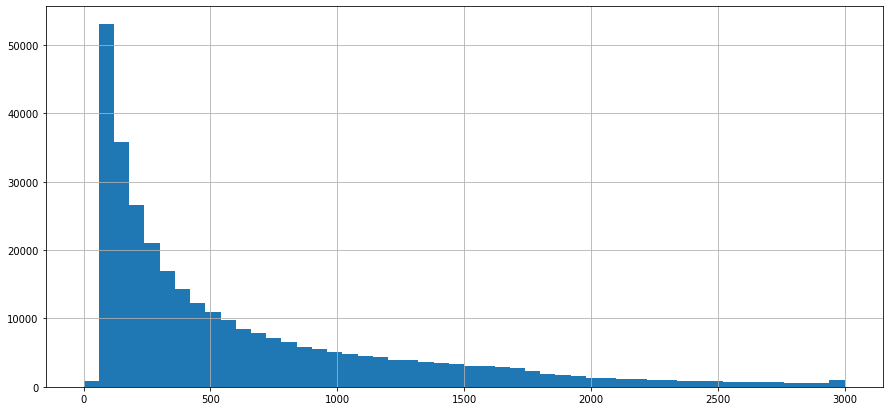

In [27]:
# Посчитаем длительнность каждой сессии
visits_log['session_duration_sec'] = (visits_log['end_ts'] - visits_log['start_ts']).dt.seconds
visits_log['session_duration_sec'].hist(figsize=(15,7), bins=50, range=(0,3000));

Распределение далеко от нормального, поэтому вместо среднего расчитаем моду.

In [28]:
print("Средняя продолжительность сессии (ASL): {} сек.".format(int(visits_log['session_duration_sec'].mode())))

Средняя продолжительность сессии (ASL): 60 сек.


---


<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Верный комментарий про вид распределения и моду - этот параметр в данном случае подходит лучше всего

</div>
    
---


***

Узнаем, как часто люди возвращаются. Для этого посчитаем Retention Rate, который показывает, сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды.

In [29]:
# Создадим столбцы с месяцем визита и месяцем первой покупки
visits_log['activity_month'] = visits_log['start_ts'].astype('datetime64[M]')
visits_log['first_activity_month'] = visits_log['first_visit_datetime'].astype('datetime64[M]')
visits_log.head()[['activity_month', 'first_activity_month']] 

,activity_month,first_activity_month
0,2017-12-01,2017-12-01
1,2018-02-01,2018-02-01
3,2018-05-01,2018-03-01
5,2017-09-01,2017-09-01
6,2018-01-01,2017-06-01


In [30]:
# Посчитаем время жизни каждой когорты и сгруппируем пользователй по когортам
visits_log['cohort_lifetime'] = (visits_log['activity_month'] - visits_log['first_activity_month']) / np.timedelta64(1,'M')
visits_log['cohort_lifetime'] = round(visits_log['cohort_lifetime'].astype('float'))
cohorts = visits_log.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts.head()

,first_activity_month,cohort_lifetime,uid
0,2017-06-01,0.0,11885
1,2017-06-01,1.0,900
2,2017-06-01,2.0,606
3,2017-06-01,3.0,710
4,2017-06-01,4.0,777


In [31]:
# Посчитаем вспомогательный столбец для расчета нулевого периода
initial_users_count = (cohorts
                       .query('cohort_lifetime==0')[['first_activity_month','uid']]
                       .rename(columns={'uid':'cohort_users'}))
initial_users_count.head()

,first_activity_month,cohort_users
0,2017-06-01,11885
12,2017-07-01,11825
23,2017-08-01,9214
33,2017-09-01,15125
42,2017-10-01,23538


In [32]:
# Объединим таблицы и посчитаем retention rate
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']
cohorts.head()

,first_activity_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0.0,11885,11885,1.000000
1,2017-06-01,1.0,900,11885,0.075726
2,2017-06-01,2.0,606,11885,0.050989
3,2017-06-01,3.0,710,11885,0.059739
4,2017-06-01,4.0,777,11885,0.065377


In [33]:
# Построим сводную таблицу и тепловую карту по ней
retention_pivot = (cohorts.pivot_table(index='first_activity_month', columns='cohort_lifetime',
                                       values='retention', aggfunc='sum'))
retention_pivot.head()

cohort_lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.075726,0.050989,0.059739,0.065377,0.067480,0.057720,0.056121,0.050989,0.049727,0.038115,0.043921
2017-07-01,1.0,0.054545,0.050402,0.055645,0.056660,0.046512,0.044059,0.044059,0.037886,0.027315,0.027061,NaN
2017-08-01,1.0,0.074452,0.060451,0.060451,0.047970,0.041459,0.036249,0.037660,0.027133,0.024745,NaN,NaN
2017-09-01,1.0,0.083570,0.067769,0.049322,0.038083,0.036959,0.035372,0.022876,0.022744,NaN,NaN,NaN
2017-10-01,1.0,0.078129,0.050811,0.037811,0.033648,0.031184,0.020775,0.019798,NaN,NaN,NaN,NaN


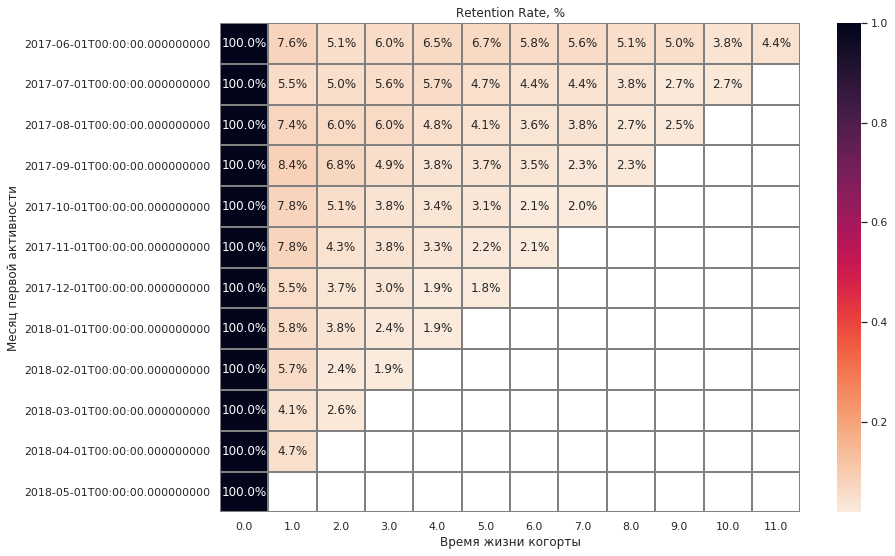

In [34]:
# Построим тепловую карту
sns.set(style='white')
plt.figure(figsize=(13, 9))
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray',  cmap=sns.cm.rocket_r)
plt.title('Retention Rate, %')
plt.xlabel("Время жизни когорты")
plt.ylabel("Месяц первой активности");

Коэффициент возврата довольно низкий для всех когорт. Для первой, июньской, значения чуть повыше. Кроме того осенью в первый меяц жизни когорты наблюдаем чуть более высокий процент.

---


<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Наглядный график и верные выводы

</div>
    
---


### Анализ продаж

Узнаем, когда люди начинают покупать. Для этого посчитаем, сколько времени проходит от первого визита до первой покупки и проанализируем распределение этих времен.

In [35]:
# Узнаем время первой покупки для каджого пользователя
first_buy_ts = orders_log.groupby('uid').agg(first_buy_ts=('buy_ts','min'))
first_buy_ts.head()

,first_buy_ts
uid,
313578113262317,2018-01-03 21:51:00
1575281904278712,2017-06-03 10:13:00
2429014661409475,2017-10-11 18:33:00
2464366381792757,2018-01-28 15:54:00
2551852515556206,2017-11-24 10:14:00


In [36]:
# Объединим предыдущую таблицу с таблицей визитов
visit_and_buy = visits_log.join(first_buy_ts, on='uid')
visit_and_buy.head() 

,uid,start_ts,end_ts,device,source_id,first_visit_datetime,session_year,session_month,session_week,session_date,session_duration_sec,activity_month,first_activity_month,cohort_lifetime,first_buy_ts
0,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,touch,4,2017-12-20 17:20:00,2017,12,51,2017-12-20,1080,2017-12-01,2017-12-01,0.0,NaT
1,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,desktop,2,2018-02-19 16:53:00,2018,2,8,2018-02-19,1680,2018-02-01,2018-02-01,0.0,NaT
3,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,desktop,9,2018-03-09 20:05:00,2018,5,20,2018-05-20,1440,2018-05-01,2018-03-01,2.0,2018-03-09 20:25:00
5,16007536194108375387,2017-09-03 21:35:00,2017-09-03 21:36:00,desktop,5,2017-09-03 21:35:00,2017,9,35,2017-09-03,60,2017-09-01,2017-09-01,0.0,2017-09-04 12:46:00
6,6661610529277171451,2018-01-30 11:13:00,2018-01-30 12:09:00,desktop,1,2017-06-29 09:00:00,2018,1,5,2018-01-30,3360,2018-01-01,2017-06-01,7.0,NaT


In [37]:
# Оставим в таблице только те строки, где есть факт покупки
visit_and_buy = visit_and_buy.query('first_buy_ts.notnull()')
visit_and_buy.shape

(91741, 15)

Сразу для избежания дальнейших проблем, проверим, есть ли среди рекламных источников номера 7 или 6.

In [38]:
visit_and_buy.query('source_id ==7 or source_id == 6')

,uid,start_ts,end_ts,device,source_id,first_visit_datetime,session_year,session_month,session_week,session_date,session_duration_sec,activity_month,first_activity_month,cohort_lifetime,first_buy_ts
83135,11377414203346034748,2017-08-17 10:28:00,2017-08-17 11:56:00,desktop,7,2017-08-17 10:28:00,2017,8,33,2017-08-17,5280,2017-08-01,2017-08-01,0.0,2017-08-17 11:20:00


Всего одна строка. Ее можно спокойно удалить.

In [39]:
# Удалим строку и проверим результат
visit_and_buy = visit_and_buy.drop(visit_and_buy.query('source_id ==7 or source_id == 6').index)
visit_and_buy.query('source_id ==7 or source_id == 6')

,uid,start_ts,end_ts,device,source_id,first_visit_datetime,session_year,session_month,session_week,session_date,session_duration_sec,activity_month,first_activity_month,cohort_lifetime,first_buy_ts


In [40]:
# Посчитаем время между визитом и покупкой
visit_and_buy['think_time'] = (visit_and_buy['first_buy_ts'] - visit_and_buy['first_visit_datetime'])
visit_and_buy.head()['think_time']

3     0 days 00:20:00
5     0 days 15:11:00
12   20 days 18:37:00
15    0 days 00:24:00
25    3 days 09:56:00
Name: think_time, dtype: timedelta64[ns]

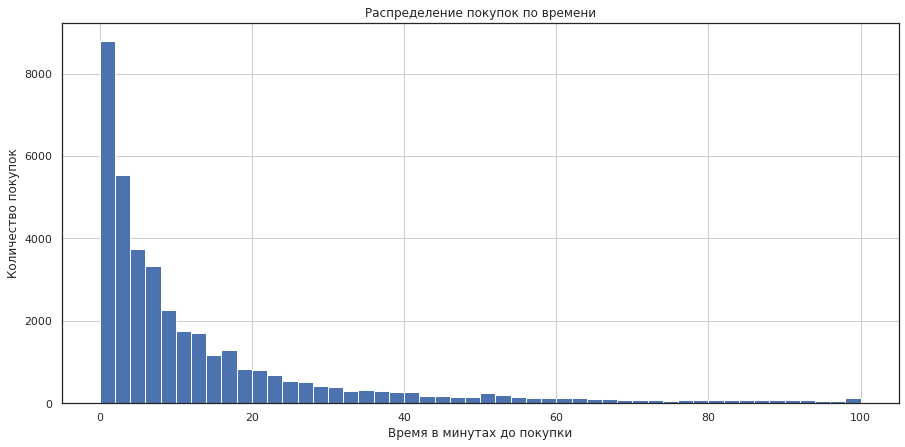

In [41]:
# Построим распределение 
(visit_and_buy['think_time'] / np.timedelta64(1,'m')).hist(figsize=(15,7), bins=50, range=(0, 100))
plt.title('Распределение покупок по времени')
plt.xlabel("Время в минутах до покупки")
plt.ylabel("Количество покупок");

Видим, что покупки в основном совершаются в первые же минуты, после визита на сайт. В случае покупок билетов люди обычно заранее знают, что именно хотят купить, поэтому получается такое короткое время.

---


<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Да, возможно это верная гипотеза, но и хороший повод для нового исследования

</div>
    
---


***

Узнаем, сколько раз люди покупают за период. Для этого построим сводную таблицу, в которой будет отражено изменение среднего количества покупок на клиента по когортам в различных месяцах.

In [42]:
visit_and_buy['uid'].nunique()

36080

In [43]:
# Сначала посчитаем общую информацию.
buyers_rate = visit_and_buy['first_buy_ts'].count() / visits_log['uid'].nunique()
regular_buyers = visit_and_buy.groupby('uid').agg(buy_count=('first_buy_ts','count')).query('buy_count > 1').count()

print("Всего посещений:", visits_log['uid'].count())
print("Всего уникальных пользователей:", visits_log['uid'].nunique(), "\n")
print("Всего пользоватей, совершивших хотя бы одну покупку:", visit_and_buy['first_buy_ts'].count())
print("Процент пользоватей, совершивших хотя бы одну покупку: {:.2%}\n".format(buyers_rate))
print("Количество покупателей, совершивших несколько покупок:", int(regular_buyers))
print("Процент покупателей, совершивших несколько покупок: {:.2%}".format(float(regular_buyers / visits_log['uid'].nunique())))

Всего посещений: 323606
Всего уникальных пользователей: 207051 

Всего пользоватей, совершивших хотя бы одну покупку: 91740
Процент пользоватей, совершивших хотя бы одну покупку: 44.31%

Количество покупателей, совершивших несколько покупок: 17003
Процент покупателей, совершивших несколько покупок: 8.21%


Почти 44% от всех 207051 клиентов совершили хотя бы одну покупку, 8% покупали несколько раз.  
Кроме того нужно помнить, что было 35794 сессий с нулевым временем. Это вполне может быть вызвано к примеру тем, что клиенты часто мискликают по какому нибудь окну с очень навзячивой рекламой, после чего сразу закрывают окно. Это также требует дополнительного исследования.

---


<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера

Тут нужно помнить, что в самом начале ты снес почти 10% данных с нулевыми сессиями. Они появились в системе не просто так, их зафиксировали маркетологи. Стоит это принимать в расчет
</div>
    
---


<div class="alert alert-block alert-info">

### Комментарий от студента  
    
Исправил 
</div>

In [44]:
# Добавим столбец с времнем первой покупки в таблицу с заказами
# Добавим вспомогательную информацию для построения когорт
orders_log = orders_log.join(first_buy_ts, on='uid')
orders_log['buy_month'] = orders_log['buy_ts'].astype('datetime64[M]')
orders_log['first_buy_month'] = orders_log['first_buy_ts'].astype('datetime64[M]')
orders_log.head() 

,buy_ts,revenue,uid,first_buy_ts,buy_month,first_buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


Сгруппируем покупки по когортам. Для каждого периода посчитаем общую выручку, количество заказов и пользователей, среднее количетсво заказов и средний чек.

In [45]:
orders_grouped = (orders_log
                  .groupby(['first_buy_month','buy_month'])
                  .agg(
                      total_revenue = ('revenue','sum'),
                      amount_of_orders = ('uid','count'),
                      amount_of_users = ('uid','nunique')))

orders_grouped['orders_per_user'] = orders_grouped['amount_of_orders'] / orders_grouped['amount_of_users']
orders_grouped['revenue_per_user'] = orders_grouped['total_revenue'] / orders_grouped['amount_of_users']
orders_grouped.head()

total_revenue  amount_of_orders  amount_of_users  \
first_buy_month buy_month                                                      
2017-06-01      2017-06-01        9557.49              2354             2023   
                2017-07-01         981.82               177               61   
                2017-08-01         885.34               174               50   
                2017-09-01        1931.30               226               54   
                2017-10-01        2068.58               292               88   

                            orders_per_user  revenue_per_user  
first_buy_month buy_month                                      
2017-06-01      2017-06-01         1.163618          4.724414  
                2017-07-01         2.901639         16.095410  
                2017-08-01         3.480000         17.706800  
                2017-09-01         4.185185         35.764815  
                2017-10-01         3.318182         23.506591

In [46]:
# Доавим время жизни когорты
orders_grouped = orders_grouped.reset_index()
orders_grouped['cohort_lifetime'] = (orders_grouped['buy_month'] - orders_grouped['first_buy_month']) / np.timedelta64(1,'M')
orders_grouped['cohort_lifetime'] = round(orders_grouped['cohort_lifetime'].astype('float'))
orders_grouped.head()

,first_buy_month,buy_month,total_revenue,amount_of_orders,amount_of_users,orders_per_user,revenue_per_user,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2354,2023,1.163618,4.724414,0.0
1,2017-06-01,2017-07-01,981.82,177,61,2.901639,16.095410,1.0
2,2017-06-01,2017-08-01,885.34,174,50,3.480000,17.706800,2.0
3,2017-06-01,2017-09-01,1931.30,226,54,4.185185,35.764815,3.0
4,2017-06-01,2017-10-01,2068.58,292,88,3.318182,23.506591,4.0


In [47]:
# Создадим сводную таблицу по количеству заказов
orders_pivot = orders_grouped.pivot_table(index='first_buy_month',
                                            columns='cohort_lifetime',
                                            values='orders_per_user',
                                            aggfunc='sum')
orders_pivot.head()

cohort_lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_buy_month,,,,,,,,,,,,
2017-06-01,1.163618,2.901639,3.480000,4.185185,3.318182,3.253731,4.451613,3.702128,3.655172,3.400000,2.133333,1.622642
2017-07-01,1.136765,1.923077,2.105263,1.625000,1.469388,2.157895,1.694444,1.282051,1.380952,1.090909,2.038462,NaN
2017-08-01,1.118978,1.862069,1.886792,1.840909,2.125000,1.937500,1.633333,1.772727,2.421053,1.483871,NaN,NaN
2017-09-01,1.136381,1.684615,1.610000,2.216216,1.288462,1.703125,1.636364,1.513514,1.418605,NaN,NaN,NaN
2017-10-01,1.143779,1.524272,1.317073,1.326087,1.387097,1.430556,1.535714,1.865672,NaN,NaN,NaN,NaN


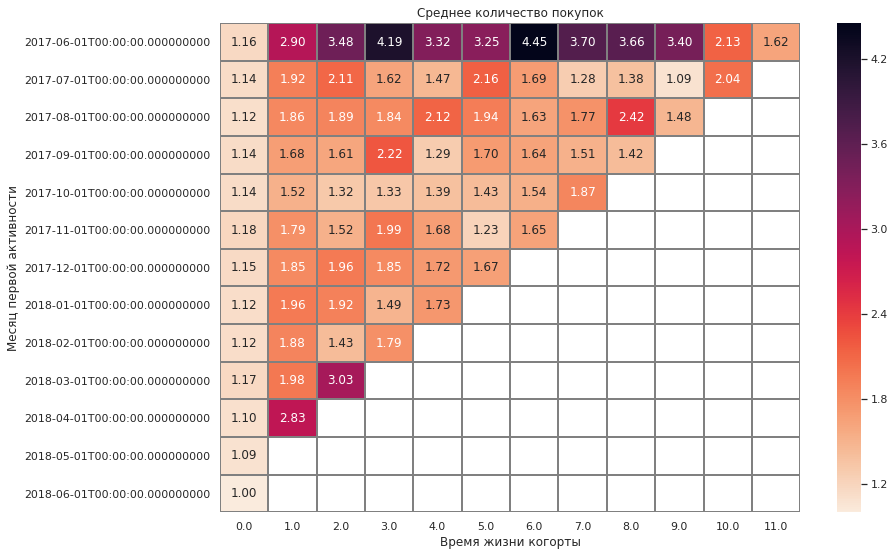

In [48]:
# Построим тепловую карту
sns.set(style='white')
plt.figure(figsize=(13, 9))
sns.heatmap(orders_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray',  cmap=sns.cm.rocket_r)
plt.title('Среднее количество покупок')
plt.xlabel("Время жизни когорты")
plt.ylabel("Месяц первой активности");

В среднем люди покупают 2-3 раза за месяц. Первая когорта покупала активнее всего.  
Для того, чтобы получить репрезентативные результаты, нужно выбрать единое время жизни когорт. Пусть это будет полгода, таким образом мы оставим чуть больше половины данных, и при этом сможем пронаблюдать динамику данных.

In [49]:
# Для каждой когорты найдем максимальное время жизни
orders_grouped = (orders_grouped
                  .join(orders_grouped
                        .groupby('first_buy_month')
                        .agg(max_cohort_lifetime=('cohort_lifetime','max')), on='first_buy_month'
                  )
                 )
orders_grouped.head()

,first_buy_month,buy_month,total_revenue,amount_of_orders,amount_of_users,orders_per_user,revenue_per_user,cohort_lifetime,max_cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2354,2023,1.163618,4.724414,0.0,11.0
1,2017-06-01,2017-07-01,981.82,177,61,2.901639,16.095410,1.0,11.0
2,2017-06-01,2017-08-01,885.34,174,50,3.480000,17.706800,2.0,11.0
3,2017-06-01,2017-09-01,1931.30,226,54,4.185185,35.764815,3.0,11.0
4,2017-06-01,2017-10-01,2068.58,292,88,3.318182,23.506591,4.0,11.0


In [50]:
# Добавим в таблицу столбец с изначальными размерами когорты
orders_grouped = (orders_grouped.merge(orders_log
                                       .groupby('first_buy_month')
                                       .agg(initial_cohort_size= ('uid','nunique')),
                                       on='first_buy_month'))
orders_grouped.head()

,first_buy_month,buy_month,total_revenue,amount_of_orders,amount_of_users,orders_per_user,revenue_per_user,cohort_lifetime,max_cohort_lifetime,initial_cohort_size
0,2017-06-01,2017-06-01,9557.49,2354,2023,1.163618,4.724414,0.0,11.0,2023
1,2017-06-01,2017-07-01,981.82,177,61,2.901639,16.095410,1.0,11.0,2023
2,2017-06-01,2017-08-01,885.34,174,50,3.480000,17.706800,2.0,11.0,2023
3,2017-06-01,2017-09-01,1931.30,226,54,4.185185,35.764815,3.0,11.0,2023
4,2017-06-01,2017-10-01,2068.58,292,88,3.318182,23.506591,4.0,11.0,2023


In [52]:
# Поделим суммарное количество покупок для каждой когорты на изначальный размер когорты
av_num_of_purchase_grouped = (orders_grouped
                      .query('max_cohort_lifetime >=6 and cohort_lifetime<=6')
                      .groupby('first_buy_month')
                      .agg( total_amount_of_orders = ('amount_of_orders','sum'),
                           initial_cohort_size = ('initial_cohort_size', 'max')
                          )
                     )
av_num_of_purchase_grouped['av_num_of_purchase'] = (av_num_of_purchase_grouped['total_amount_of_orders'] 
                                                    / av_num_of_purchase_grouped['initial_cohort_size'])
av_num_of_purchase_grouped['av_num_of_purchase'].round(2)

first_buy_month
2017-06-01    1.84
2017-07-01    1.42
2017-08-01    1.47
2017-09-01    1.46
2017-10-01    1.35
2017-11-01    1.45
Name: av_num_of_purchase, dtype: float64

За полгода среднее количество покупок на когорту уменьшилось с 1.84 до 1.45.

---


<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера

Верно, тут хорошо бы еще посчитать среднее число покупок на пользователя к какому-то периоду, например за пол года
</div>
    
---


<div class="alert alert-block alert-info">

### Комментарий от студента  
    
Исправил 
</div>

---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера V2

Вот тут осторожней. У тебя по месяцам разное число покупателей. Этут метрику стоит считать от числа покупателей в когорте, а не в месяц

</div>

---


<div class="alert alert-block alert-info">

### Комментарий от студента V2  
    
Исправил: Выделил когорты с жизнью больше  месяцев. Проссуммировал количество заказов для каждой когорты и поделил на изначальный размер когорты. 
</div>

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера V3

Супер!

</div>

---

***

Посчитаем средний чек. Построим сводную таблицу изменения среднего чека, где в столбцах будет lifetime, а строках — когорты.

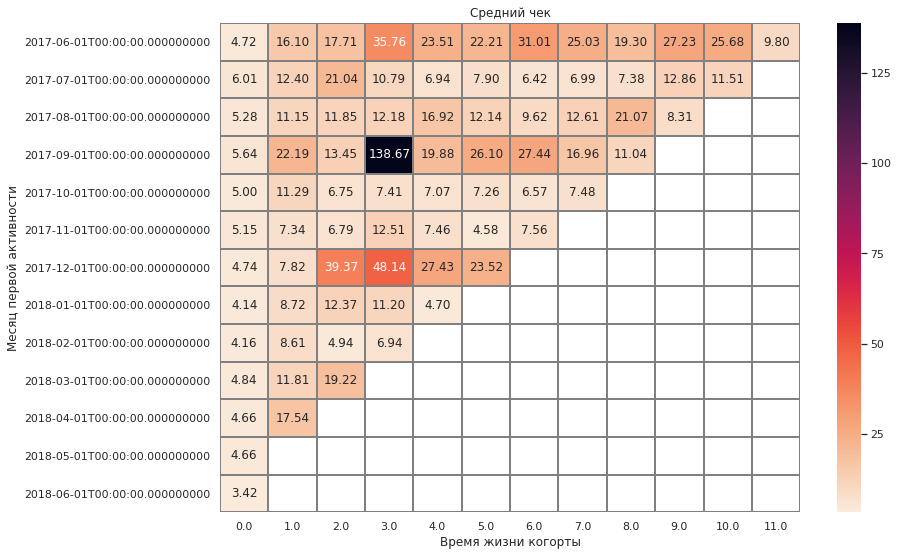

In [53]:
# Построим сводную таблицу и тепловую карту
revenue_per_user_pivot = orders_grouped.pivot_table(index='first_buy_month',
                                                    columns='cohort_lifetime',
                                                    values='revenue_per_user',
                                                    aggfunc='mean')

sns.set(style='white')
plt.figure(figsize=(13, 9))
sns.heatmap(revenue_per_user_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray',  cmap=sns.cm.rocket_r)
plt.title('Средний чек')
plt.xlabel("Время жизни когорты")
plt.ylabel("Месяц первой активности");

Почти во всех когортах пик приходится на 3-4 месяц жизни. В сентябрьской когорте видим необычно высокий пик значения на 4 месяц.

In [56]:
# Узнаем срдений чек по когорте
av_check_grouped = (orders_grouped
                      .query('max_cohort_lifetime >=6 and cohort_lifetime<=6')
                      .groupby('first_buy_month')
                      .agg( total_revenue = ('total_revenue','sum'),
                           initial_cohort_size = ('initial_cohort_size', 'max')
                          )
                     )
av_check_grouped['av_check'] = (av_check_grouped['total_revenue'] / av_check_grouped['initial_cohort_size'])
av_check_grouped['av_check'].round(2)

first_buy_month
2017-06-01     9.31
2017-07-01     7.78
2017-08-01     7.59
2017-09-01    13.01
2017-10-01     6.24
2017-11-01     6.40
Name: av_check, dtype: float64

In [71]:
# Посчитаем общий средний чек 
av_check = (orders_log['revenue'].sum() 
            / (orders_log.groupby('first_buy_month').agg(initial_cohort_size= ('uid','nunique'))).sum())

print("Средний чек: {:.2f} руб.".format(float(av_check)))

Средний чек: 6.90 руб.


---


<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера

Так какой же средний чек у бизнеса?
</div>
    
---


<div class="alert alert-block alert-info">

### Комментарий от студента  
    
Исправил 
</div>

---


<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера V2

Тут такая же ошибка что и выше

Посмотрим пример:
- 1 Месяц - 100 покупок по 1 руб (среднее -- 1 руб)
- 2 Месяц - 1 покупка за 5 руб (среднее -- 5 руб)
- В среднем по когорте (Твой вариант) (1+5)/2 = 3
- В среднем по когорте (реальный расчет) (100*1 + 1*5)/101 = 1,04

Посмотри насколько сильно может различаться ответ, если усреднять несопоставимые понятия. А у нас именно так и происходит, все покупки в основном совершаются в первый месяц    

</div>
    
---


<div class="alert alert-block alert-info">

### Комментарий от студента V2  
    
Исправил. Посчитал средничй чек по когортам, так же, как и в предыдущем пункте. + Поделил общую выручку на общее количество уникальных пользователей, чтобы найти общий средний чек.
</div>

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера V3

Принимается

</div>

---

***

Посчитаем LTV, то есть сколько денег приносят пользователи.  
Маржинальность нам неизвестна, но в случае онлайн продаж она в любом случае перенебрежимо мала. Поэтому при расчетах маржинальностью можно пренебречь.

In [54]:
# Посчитаем LTV 
orders_grouped['ltv'] = orders_grouped['total_revenue'] / orders_grouped['initial_cohort_size']
orders_grouped.head()['ltv']

0    4.724414
1    0.485329
2    0.437637
3    0.954671
4    1.022531
Name: ltv, dtype: float64

In [55]:
orders_grouped

,first_buy_month,buy_month,total_revenue,amount_of_orders,amount_of_users,orders_per_user,revenue_per_user,cohort_lifetime,initial_cohort_size,ltv
0,2017-06-01,2017-06-01,9557.49,2354,2023,1.163618,4.724414,0.0,2023,4.724414
1,2017-06-01,2017-07-01,981.82,177,61,2.901639,16.095410,1.0,2023,0.485329
2,2017-06-01,2017-08-01,885.34,174,50,3.480000,17.706800,2.0,2023,0.437637
3,2017-06-01,2017-09-01,1931.30,226,54,4.185185,35.764815,3.0,2023,0.954671
4,2017-06-01,2017-10-01,2068.58,292,88,3.318182,23.506591,4.0,2023,1.022531
...,...,...,...,...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,176,58,3.034483,19.221897,2.0,3533,0.315559
75,2018-04-01,2018-04-01,10600.69,2495,2276,1.096221,4.657597,0.0,2276,4.657597
76,2018-04-01,2018-05-01,1209.92,195,69,2.826087,17.535072,1.0,2276,0.531599
77,2018-05-01,2018-05-01,13925.76,3249,2988,1.087349,4.660562,0.0,2988,4.660562


In [57]:
# Выберем только те когорты, которые прожили 6 месяцев.
# Посторим сводную таблицу по LTV и посчитаем суммарный LTV для каждой  когорты
ltv_pivot = (orders_grouped
             .query('max_cohort_lifetime >=6 and cohort_lifetime<=6') 
             .pivot_table(index='first_buy_month',
                                                    columns='cohort_lifetime',
                                                    values='ltv',
                                                    aggfunc='mean'))
ltv_pivot.sum(axis=1).round(2)

first_buy_month
2017-06-01     9.31
2017-07-01     7.78
2017-08-01     7.59
2017-09-01    13.01
2017-10-01     6.24
2017-11-01     6.40
dtype: float64


---

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера

Здесь, как мне кажется, есть определенная проблема с тем, что когорты прожили не одинаковое количество времени. Лучше выбрать условное "время жизни" когорты, и считать результативность исходя из него -- например, 6 месяцев -- чтобы не слишком много когорт отсечь, потому что они прожили меньше этого времени. И главное смотреть, чтобы когорты прожили это время)
</div>

---


<div class="alert alert-block alert-info">

### Комментарий от студента  
    
Исправил 
</div>


---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера V2

Ок, только выводов нет
</div>

---

### Анализ маркетинга 

Узнаем, сколько денег потратили.

In [58]:
# Узаем сколько потратили всего
print("Всего потрачено на рекламу:", costs['costs'].sum())

Всего потрачено на рекламу: 329131.62


In [59]:
# Узнаем сколько потратили на каждый источник
costs.groupby('source_id').agg(cost_by_source=('costs','sum'))

,cost_by_source
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


На источник 3 было потрачено в разы больше, чем на остальные.

In [60]:
# Добавим столбец с месяцем
costs['month'] = costs['dt'].astype('datetime64[M]')
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [61]:
# Посчитаем ежемесячные расходы
monthly_costs  = costs.groupby('month').agg(total_costs=('costs','sum'))
monthly_costs

,total_costs
month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


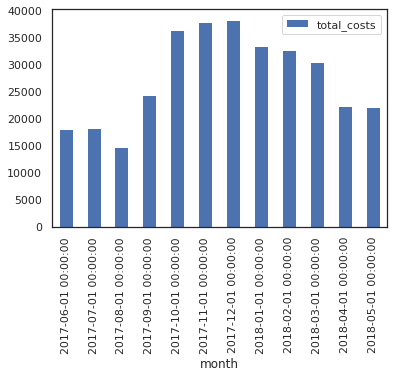

In [62]:
# Построим график по таблице
monthly_costs.plot.bar();

На лето 17 года приходятся минимальные траты. Видим резкий рост затрат на конец осени и начало зимы в 17 году. 

---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера

Расчет верный. В выводах хотелось бы больше конкретики
</div>

---


***

Узнаем, сколько стоило привлечение одного покупателя из каждого источника. Для этого посчитаем CAC, сумму денег, в которую обходится новый клиент компании.  
Также узнаем, на сколько окупились расходы, то есть посчитаем ROI, который в данной задаче равняется ROMI. Для этого, для каждого пользователя нужно по самой первой сессии получить устройство и источник и считать ROI по этим данным.

In [63]:
# Добавим в таблицу данные по устройства и источникам рекламы
orders_log = orders_log.merge(visit_and_buy
                              .query('start_ts == first_visit_datetime')
                              [['uid','first_activity_month','device','source_id']],
                              how='left', on='uid')
orders_log.head()

,buy_ts,revenue,uid,first_buy_ts,buy_month,first_buy_month,first_activity_month,device,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01,desktop,1.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01,desktop,2.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01,desktop,2.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01,desktop,2.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01,desktop,3.0


In [64]:
# сгруппируем затраты по месяцам и источникам
costs_by_source = costs.groupby(['source_id','month']).agg(costs_by_source = ('costs','sum'))
costs_by_source = costs_by_source.reset_index()
costs_by_source.head()

,source_id,month,costs_by_source
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75


In [65]:
# Создадим вспомогательную функцию для построения когорт
def create_cohorts(group_param):
    # Сгруппируем по девайсам/источникам(group_param), первому и текущему месяцам покупок
    data = (orders_log
            .groupby([group_param,'first_buy_month','buy_month'])
            .agg(
                total_revenue = ('revenue','sum'),
                amount_of_orders = ('uid','count'),
                amount_of_users = ('uid','nunique')))
    data = data.reset_index()
    
    # Добавим изначальный размер когорт
    data = (data.merge(orders_log
                       .groupby([group_param,'first_buy_month'])
                       .agg(initial_cohort_size = ('uid','nunique')).reset_index(),
                       on=[group_param,'first_buy_month']))
    # Добавим общие месячные затраты
    data = pd.merge(data, monthly_costs, left_on='first_buy_month', right_on='month')
    if group_param =="source_id":
        data = pd.merge(data, costs_by_source, left_on=[group_param,'first_buy_month'], right_on=[group_param,'month'])
    
    # Посчитаем экономические параметры
    data['orders_per_user'] = data['amount_of_orders'] / data['amount_of_users']
    data['revenue_per_user'] = data['total_revenue'] / data['amount_of_users']

    data['cohort_lifetime'] = (data['buy_month'] - data['first_buy_month']) / np.timedelta64(1,'M')
    data['cohort_lifetime'] = round(data['cohort_lifetime'].astype('float'))
    
    data = (data
            .join(data
                  .groupby('first_buy_month')
                  .agg(max_cohort_lifetime=('cohort_lifetime','max')), on='first_buy_month')
                 )
    data = data.query('max_cohort_lifetime >=6 and cohort_lifetime<=6')
    data['ltv'] = data['total_revenue'] / data['initial_cohort_size']
    if group_param =="source_id":
        data['cac'] = data['costs_by_source'] / data['initial_cohort_size']
    else:
        data['cac'] = data['total_costs'] / data['initial_cohort_size']
    data['romi'] = data['ltv'] / data['cac']
    return data    

In [66]:
# Создадим вспомогательную функцию для построения мини отчетов
def create_report(data, list_of_columns, object_list, group_param):
    result= pd.DataFrame(index=ltv_pivot.index)
    counter = 0
    
    if group_param == "source_id":
        condition = 'source_id == @it_object'
    else:
        condition = 'device == @it_object'
    
    for it_object in object_list:
        result[list_of_columns[counter]] = (data
                                            .query(condition)
                                            .pivot_table(index='first_buy_month',
                                                         columns='cohort_lifetime',
                                                         values='ltv',
                                                         aggfunc='mean')
                                            .sum(axis=1).round(2))
        result[list_of_columns[counter+1]] = data.query(condition)['cac'].unique().round(2)
        result[list_of_columns[counter+2]] = (result[list_of_columns[counter]]
                                              / result[list_of_columns[counter+1]]).round(2)
        counter+=3

    return result

In [67]:
# Составим когорты по источникам рекламы
orders_by_source = create_cohorts('source_id') 
orders_by_source.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

,source_id,first_buy_month,buy_month,total_revenue,amount_of_orders,amount_of_users,initial_cohort_size,total_costs,month,costs_by_source,orders_per_user,revenue_per_user,cohort_lifetime,max_cohort_lifetime,ltv,cac,romi
0,1.0,2017-06-01,2017-06-01,1326.73,258,190,190,18015.0,2017-06-01,1125.61,1.357895,6.982789,0.0,11.0,6.982789,5.924263,1.178676
1,1.0,2017-06-01,2017-07-01,421.09,80,16,190,18015.0,2017-06-01,1125.61,5.000000,26.318125,1.0,11.0,2.216263,5.924263,0.374099
2,1.0,2017-06-01,2017-08-01,393.23,77,9,190,18015.0,2017-06-01,1125.61,8.555556,43.692222,2.0,11.0,2.069632,5.924263,0.349348
3,1.0,2017-06-01,2017-09-01,422.88,79,8,190,18015.0,2017-06-01,1125.61,9.875000,52.860000,3.0,11.0,2.225684,5.924263,0.375690
4,1.0,2017-06-01,2017-10-01,682.96,78,12,190,18015.0,2017-06-01,1125.61,6.500000,56.913333,4.0,11.0,3.594526,5.924263,0.606747


In [68]:
# Создадим вспомогательные списки для построения отчета
source_id_list = list(map(int, orders_by_source['source_id'].value_counts().index))
source_id_list.sort()
list_of_source_columns = []
for source_id in source_id_list:
    list_of_source_columns.append('ltv_'+ str(source_id))
    list_of_source_columns.append('cac_'+ str(source_id))
    list_of_source_columns.append('romi_'+ str(source_id))
list_of_source_columns[0:7]

['ltv_1', 'cac_1', 'romi_1', 'ltv_2', 'cac_2', 'romi_2', 'ltv_3']

In [69]:
# Посторим отчет по источникам
source_result = create_report(orders_by_source, list_of_source_columns, source_id_list, "source_id")
source_result

,ltv_1,cac_1,romi_1,ltv_2,cac_2,romi_2,ltv_3,cac_3,romi_3,ltv_4,...,romi_4,ltv_5,cac_5,romi_5,ltv_9,cac_9,romi_9,ltv_10,cac_10,romi_10
first_buy_month,,,,,,,,,,,,,,,,,,,,,
2017-06-01,20.64,5.92,3.49,11.31,10.46,1.08,5.51,12.27,0.45,9.51,...,1.11,10.92,6.87,1.59,6.08,4.19,1.45,2.46,3.42,0.72
2017-07-01,17.10,6.46,2.65,10.70,11.33,0.94,7.08,15.38,0.46,6.09,...,0.88,5.85,7.19,0.81,6.80,5.71,1.19,8.32,6.47,1.29
2017-08-01,13.41,8.42,1.59,7.84,14.72,0.53,6.13,18.12,0.34,6.01,...,0.62,9.32,6.21,1.50,5.40,4.08,1.32,5.44,6.29,0.86
2017-09-01,10.01,6.39,1.57,25.09,13.27,1.89,6.55,13.09,0.50,7.47,...,0.83,26.27,6.64,3.96,7.97,4.72,1.69,2.57,5.30,0.48
2017-10-01,7.95,6.73,1.18,12.38,12.58,0.98,5.62,13.95,0.40,5.18,...,0.94,6.04,6.15,0.98,6.97,4.80,1.45,2.77,3.04,0.91
2017-11-01,10.10,7.32,1.38,9.65,13.02,0.74,5.00,14.27,0.35,6.74,...,1.46,5.28,9.19,0.57,4.49,4.91,0.91,5.03,6.29,0.80


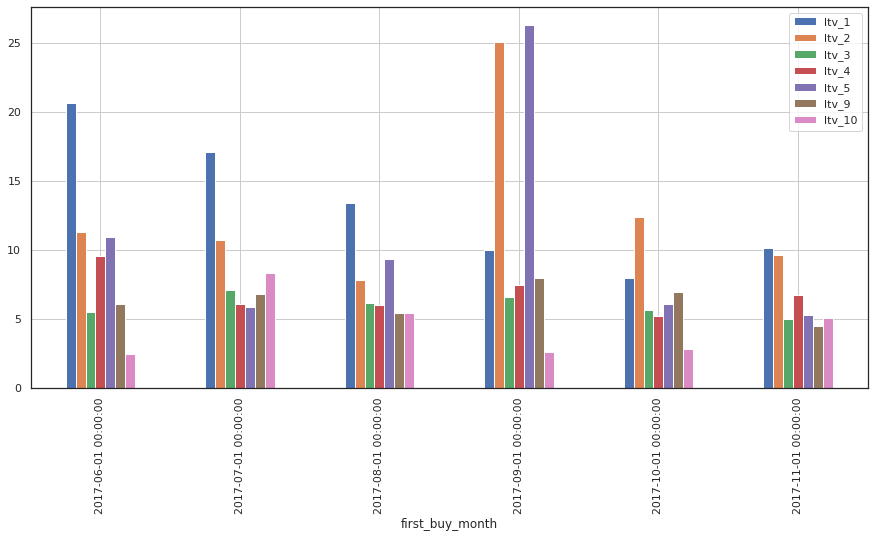

In [70]:
# Построим график по LTV
(source_result [[idx for idx in list_of_source_columns if idx.startswith('ltv_')]]
 .plot( grid=True, kind='bar', figsize=(15,7)));

Почти для всех месяцев самый большой LTV для 1 и 2 источников. Для сентябрьской когорты видим резкий рост 5 источника.

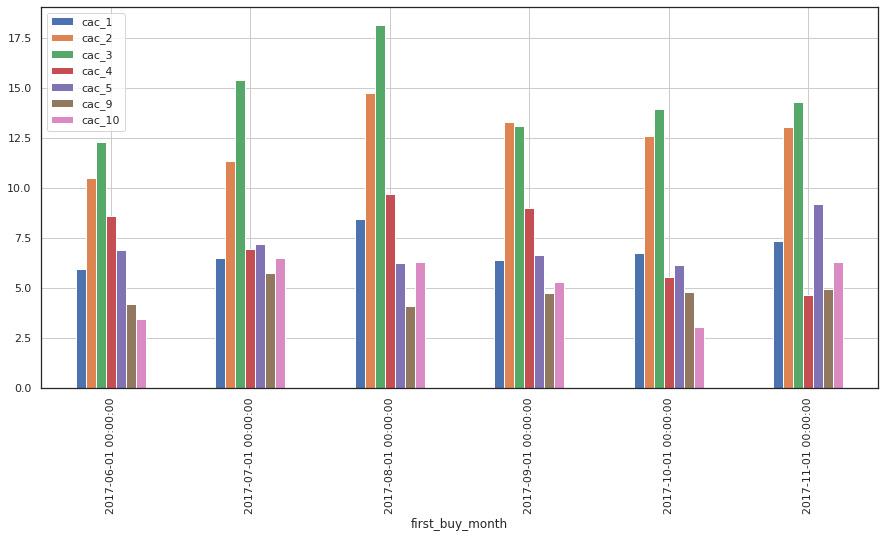

In [71]:
# Построим график по CAC
(source_result [[idx for idx in list_of_source_columns if idx.startswith('cac_')]]
 .plot( grid=True, kind='bar', figsize=(15,7)));

Для всех периодов самый большой показатель CAC из 2 и 3 источников.

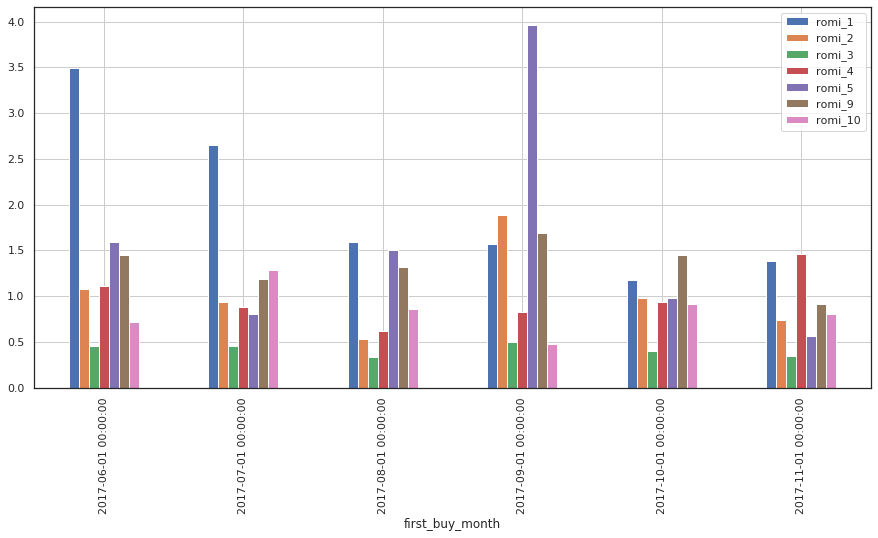

In [72]:
# Построим график по ROMI
(source_result [[idx for idx in list_of_source_columns if idx.startswith('romi_')]]
 .plot( grid=True, kind='bar', figsize=(15,7)));

Летом 17 больше всего окупаемость с источника 1. В сентябре - с источника 5.
Начиная с января 18 года, почти по всем источникам ROMI меньше единицы.

In [73]:
# Построим когорты по источникам
orders_by_device = create_cohorts('device') 
orders_by_device.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

,device,first_buy_month,buy_month,total_revenue,amount_of_orders,amount_of_users,initial_cohort_size,total_costs,orders_per_user,revenue_per_user,cohort_lifetime,max_cohort_lifetime,ltv,cac,romi
0,desktop,2017-06-01,2017-06-01,8247.05,1983,1691,1691,18015.0,1.172679,4.877025,0.0,11.0,4.877025,10.653459,0.457788
1,desktop,2017-06-01,2017-07-01,882.43,166,51,1691,18015.0,3.254902,17.302549,1.0,11.0,0.521839,10.653459,0.048983
2,desktop,2017-06-01,2017-08-01,844.70,169,45,1691,18015.0,3.755556,18.771111,2.0,11.0,0.499527,10.653459,0.046889
3,desktop,2017-06-01,2017-09-01,1905.09,221,52,1691,18015.0,4.250000,36.636346,3.0,11.0,1.126606,10.653459,0.105750
4,desktop,2017-06-01,2017-10-01,1992.87,278,81,1691,18015.0,3.432099,24.603333,4.0,11.0,1.178516,10.653459,0.110623


In [74]:
# Подготовим вспомогательные списки и построим отчет по источникам
list_of_device_columns = ['ltv_desktop', 'cac_desktop','romi_desktop','ltv_touch', 'cac_touch','romi_touch']
list_of_devices =  list(orders_by_device['device'].unique())

device_result = create_report(orders_by_device, list_of_device_columns, list_of_devices, "device")
device_result

,ltv_desktop,cac_desktop,romi_desktop,ltv_touch,cac_touch,romi_touch
first_buy_month,,,,,,
2017-06-01,10.20,10.65,0.96,4.69,57.74,0.08
2017-07-01,8.12,12.03,0.67,6.72,47.13,0.14
2017-08-01,7.97,13.37,0.60,6.17,58.69,0.11
2017-09-01,13.85,11.93,1.16,10.12,47.69,0.21
2017-10-01,6.46,10.38,0.62,5.52,46.04,0.12
2017-11-01,6.42,11.45,0.56,6.38,51.65,0.12


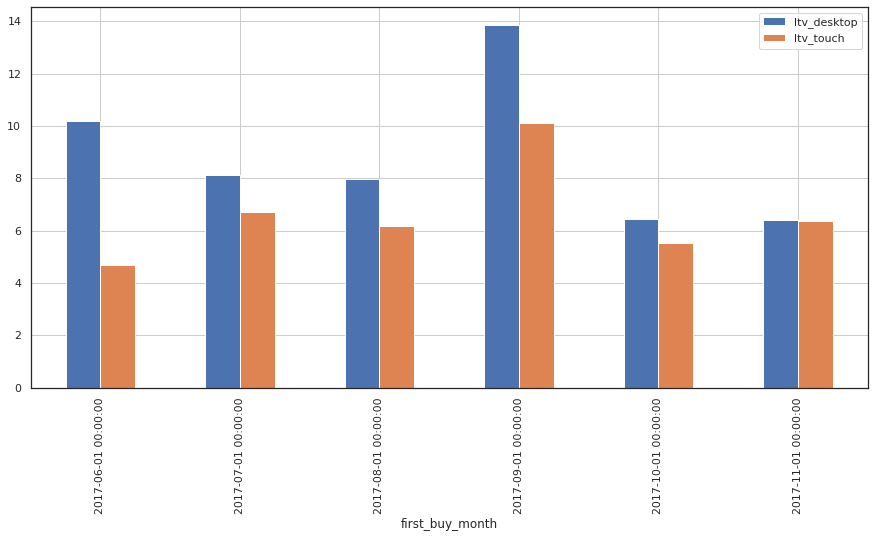

In [75]:
# Построим график по LTV
(device_result [[idx for idx in list_of_device_columns if idx.startswith('ltv_')]]
 .plot( grid=True, kind='bar', figsize=(15,7)));

Почти для всех периодов LTV  выше для десктопа.

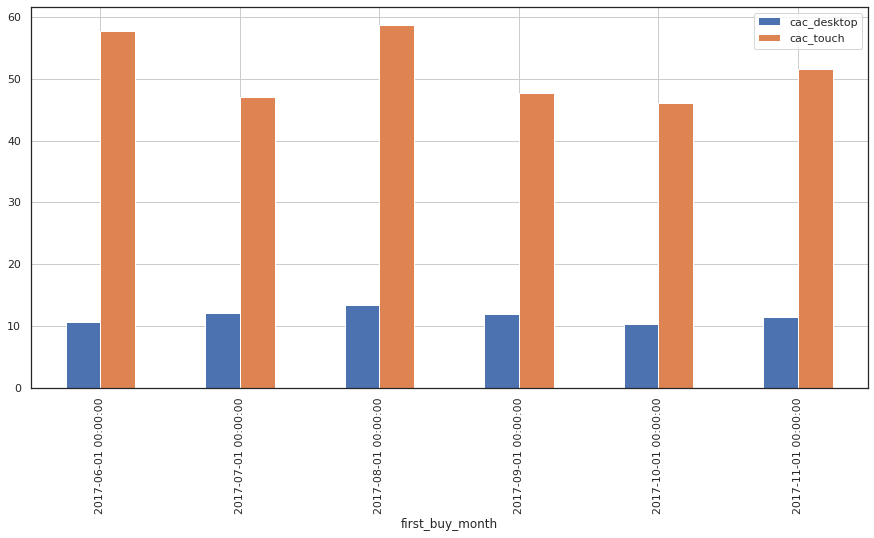

In [76]:
# Построим график по CAC
(device_result [[idx for idx in list_of_device_columns if idx.startswith('cac_')]]
 .plot( grid=True, kind='bar', figsize=(15,7)));

CAC не оправданно высок для всех периодов.

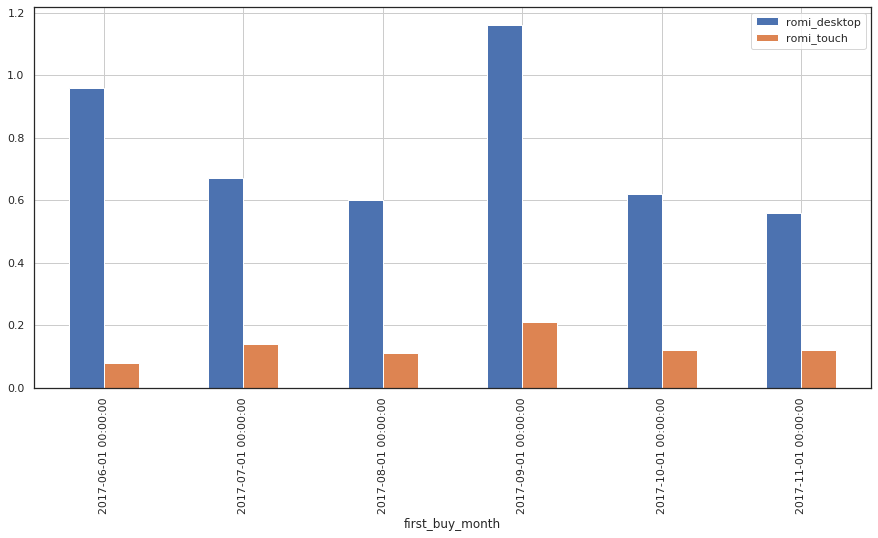

In [77]:
# Построим график по ROMI
(device_result [[idx for idx in list_of_device_columns if idx.startswith('romi_')]]
 .plot( grid=True, kind='bar', figsize=(15,7)));

Ожидаемо ROMI для мобильных версий очень мал. Для десктопных - приемлимый.Мобильная версия совсем не окупается.


---

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера

Здесь такое же замечание как в предыдущем комментарии по LTV -- необходимо выбрать какое-то время жизни. А расчеты верные
</div>

---


<div class="alert alert-block alert-info">

### Комментарий от студента  
    
Исправил 
</div>

## Вывод

Анализ показал, что пользователи в разы активне посещают сайт и совершают покупки с десктопных устройств, нежели чем с мобильных. Это приводит к тому, что затраты на мобильную версию совсем не окупаются.  
Почти для всех периодов самый большой LTV для 1 и 2 источников, а самый большой показатель CAC из 2 и 3 источников.

Для дальнейшего построения стратегии развития, целесообразно сосредоточиться на декстопной версии, снизить затраты на 3 источник рекламы, и повысить вложения в 1 источник.

---

<div class="alert alert-block alert-warning">
    

### Общий Комментарий от ревьюера

В целом -- отличный отчет! Приятно его читать, все понятно, картинки красивые, выводы верные и полезные. Есть недочет, связанный с подсчетами окупаемости -- из-за того что нужно зафиксировать одинаковое время жизни пользователя. 
    
И прошу отдельно уделить внимание выводам, как промежуточным, так и итговым. Из них должно быть все понятно, даже если у пользователя отчета нет времени или знаний вникнуть в твои расчеты.
    
Я думаю, ты все быстро поправишь и жду новой версии)
</div>

---


---

<div class="alert alert-block alert-warning">
    

### Общий Комментарий от ревьюера V2

Мне очень понравилось как ты доработал проект, учел все мои замечания. К сожалению вылезла досадная ошибка (среднее от среднего), обязательно нужно этот момент понять и поправить
</div>

---


---

<div class="alert alert-block alert-success">
    

### Общий Комментарий от ревьюера v2

Отлично, критичных замечаний у меня не осталось -- работа зачтена!)
</div>

---
